In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as stats
import scipy.io 

In [2]:
LO = 1.2

NO = 600

xO = np.linspace(0,LO,NO)
dxO = xO[1] - xO[0]

t_f = 9.6
t_N = 9600
t = np.linspace(0,t_f,t_N)
dt = t[1] - t[0]

W = 10


c1 = 0.5


re = 0.5
rw = 0.5

KO = np.zeros((W,t_N,NO))
RO = np.zeros((W,t_N,NO))


KO[0,0,:] = np.linspace(2, 1 ,NO)
RO[0,0,0] = (1/rw)*KO[0,0,0]
RO[0,0,NO-1] = re*KO[0,0,NO-1]
RO[0,0,:] = np.linspace(RO[0,0,0] , RO[0,0,NO-1]  ,NO)


sigma = 1 

In [3]:
KO = scipy.io.loadmat('Ocean_Problem_Kelvin.mat')
RO = scipy.io.loadmat('Ocean_Problem_Rossby.mat')

KO = KO['Kelvin']
RO = RO['Rossby']

In [4]:
def Kelvin_fixed_time(x):
    y = np.zeros(NO) 
    for i in range(NO):
        if x[i] <= LO/2:
            y[i] = (1/2)*((-3.5/1.2)*(-x[i] +LO/(2))/3 + 4)
            #y[i] = (1/2)*((-3.5/1.2)*(LO/6 - x[i])  + 4) 
        else:
            y[i] = (-5/6)*(x[i] - (LO)/2 ) +2
    return y  

In [5]:
def Rossby_fixed_time(x):
    y = np.zeros(NO) 
    for i in range(NO):
        if x[i] <= LO/3:
            y[i] = -(3.5/1.2)*(x[i] +2*LO/3) + 4
        elif x[i] > LO/3 and x[i] <= 2*LO/3:
            y[i] = (1/2)*((-5/6)*(2*LO - 3*x[i]) +2)
        else:
            y[i] =  (-(3.5/1.2)*(x[i] - 2*LO/3) + 4)/4
    return y   

In [6]:
K_variance_W = scipy.io.loadmat('Ocean_Problem_Kelvin_Variance.mat')
R_variance_W = scipy.io.loadmat('Ocean_Problem_Rossby_Variance.mat')

K_variance_W = K_variance_W['Kelvin_variance']
R_variance_W = R_variance_W['Rossby_variance']

In [7]:
def Kelvin_variance(x):
    return (sigma**2)*((re**2)*(rw**2)*(LO-x)/c1 + (rw**2)*(3*LO/c1) + x/c1)

def Rossby_variance(x):
    return (sigma**2)*((re**2)*(rw**2)*(3*x/c1) + (re**2)*(LO/c1) + (3*LO - 3*x)/c1)   

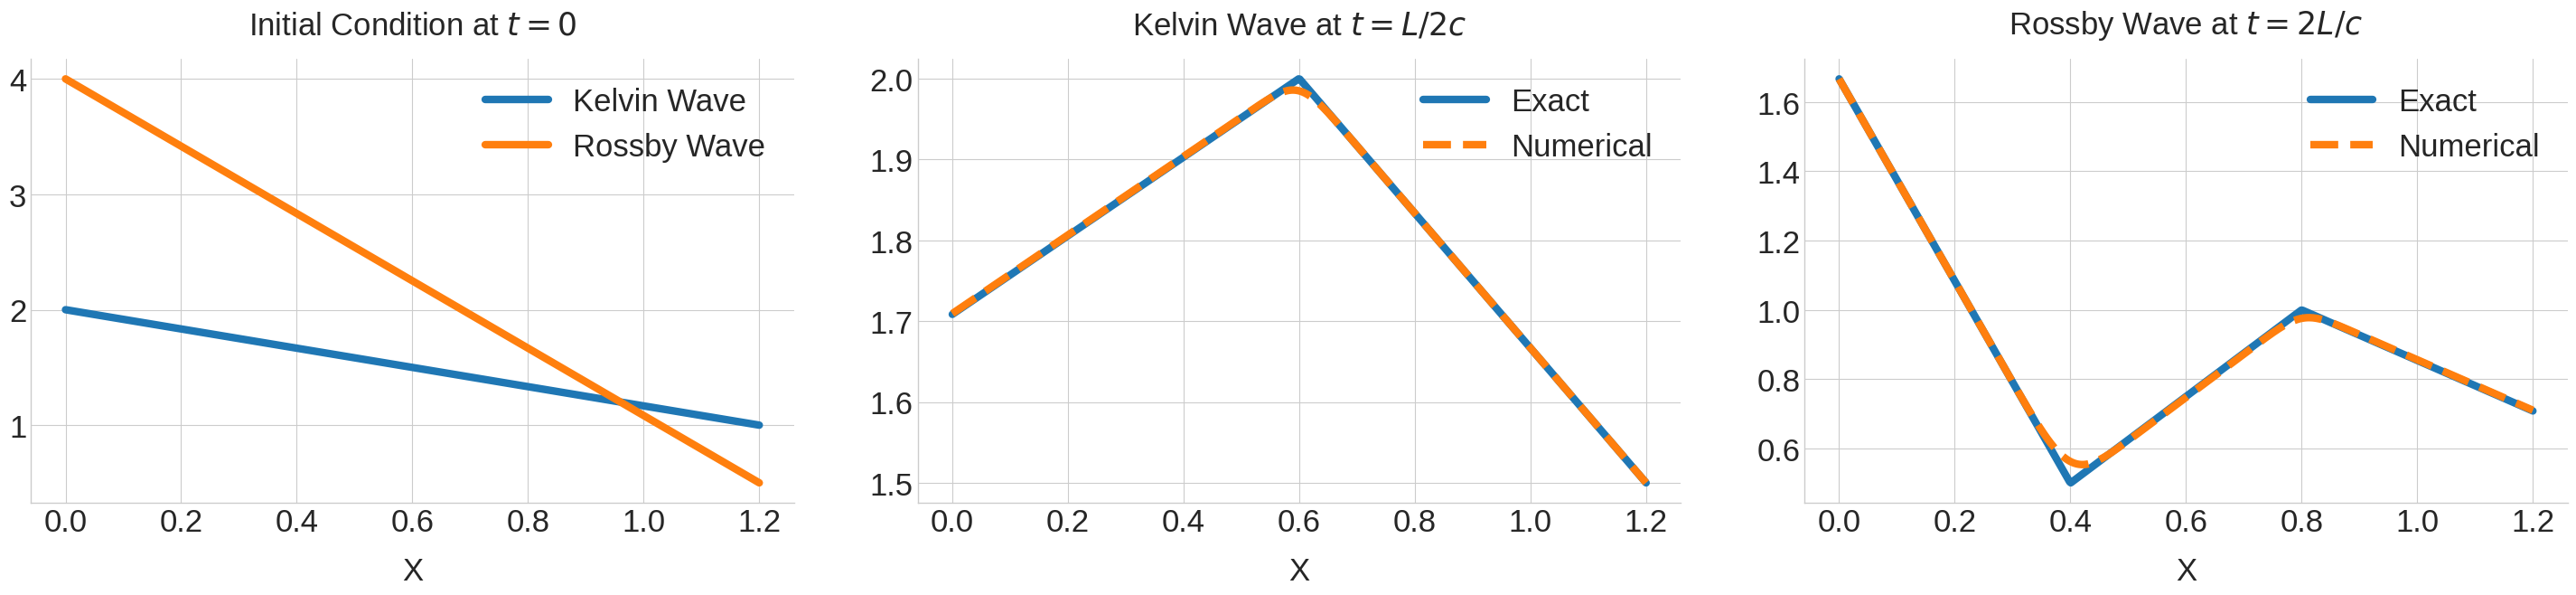

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(30, 7.5), dpi=100)

# Enhance overall aesthetics
plt.style.use('seaborn-whitegrid')

# Plot 1: Initial Conditions
axs[0].plot(xO, KO[0, 0, :], linewidth=6, label='Kelvin Wave')
axs[0].plot(xO, RO[0, 0, :], linewidth=6, label='Rossby Wave')
axs[0].legend(fontsize=25, loc='upper right')
axs[0].set_xlabel('X', size=25, labelpad=15)
axs[0].set_title('Initial Condition at $t=0$', size=25, pad=20)
axs[0].grid(True)
axs[0].tick_params(axis='both', which='major', labelsize=25)
axs[0].tick_params(axis='both', which='minor', labelsize=25)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot 2: Kelvin Wave
axs[1].plot(xO, Kelvin_fixed_time(xO), linewidth=6,  label='Exact')
axs[1].plot(xO, KO[0, 1200, :], linewidth=6,linestyle='--', label='Numerical')
axs[1].legend(fontsize=25, loc='upper right')
axs[1].set_xlabel('X', size=25, labelpad=15)
axs[1].set_title('Kelvin Wave at $t = L/2c$', size=25, pad=20)
axs[1].grid(True)
axs[1].tick_params(axis='both', which='major', labelsize=25)
axs[1].tick_params(axis='both', which='minor', labelsize=25)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Plot 3: Rossby Wave
axs[2].plot(xO, Rossby_fixed_time(xO), linewidth=6,  label='Exact')
axs[2].plot(xO, RO[0, 4800, :], linewidth=6, linestyle='--', label='Numerical')
axs[2].legend(fontsize=25, loc='upper right')
axs[2].set_xlabel('X', size=25, labelpad=15)
axs[2].set_title('Rossby Wave at $t = 2L/c$', size=25, pad=20)
axs[2].grid(True)
axs[2].tick_params(axis='both', which='major', labelsize=25)
axs[2].tick_params(axis='both', which='minor', labelsize=25)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout(pad=4.0)

# Display plot

# Save plot if needed
plt.savefig("Problem1_Initial.png", bbox_inches='tight', dpi=300)
plt.show()


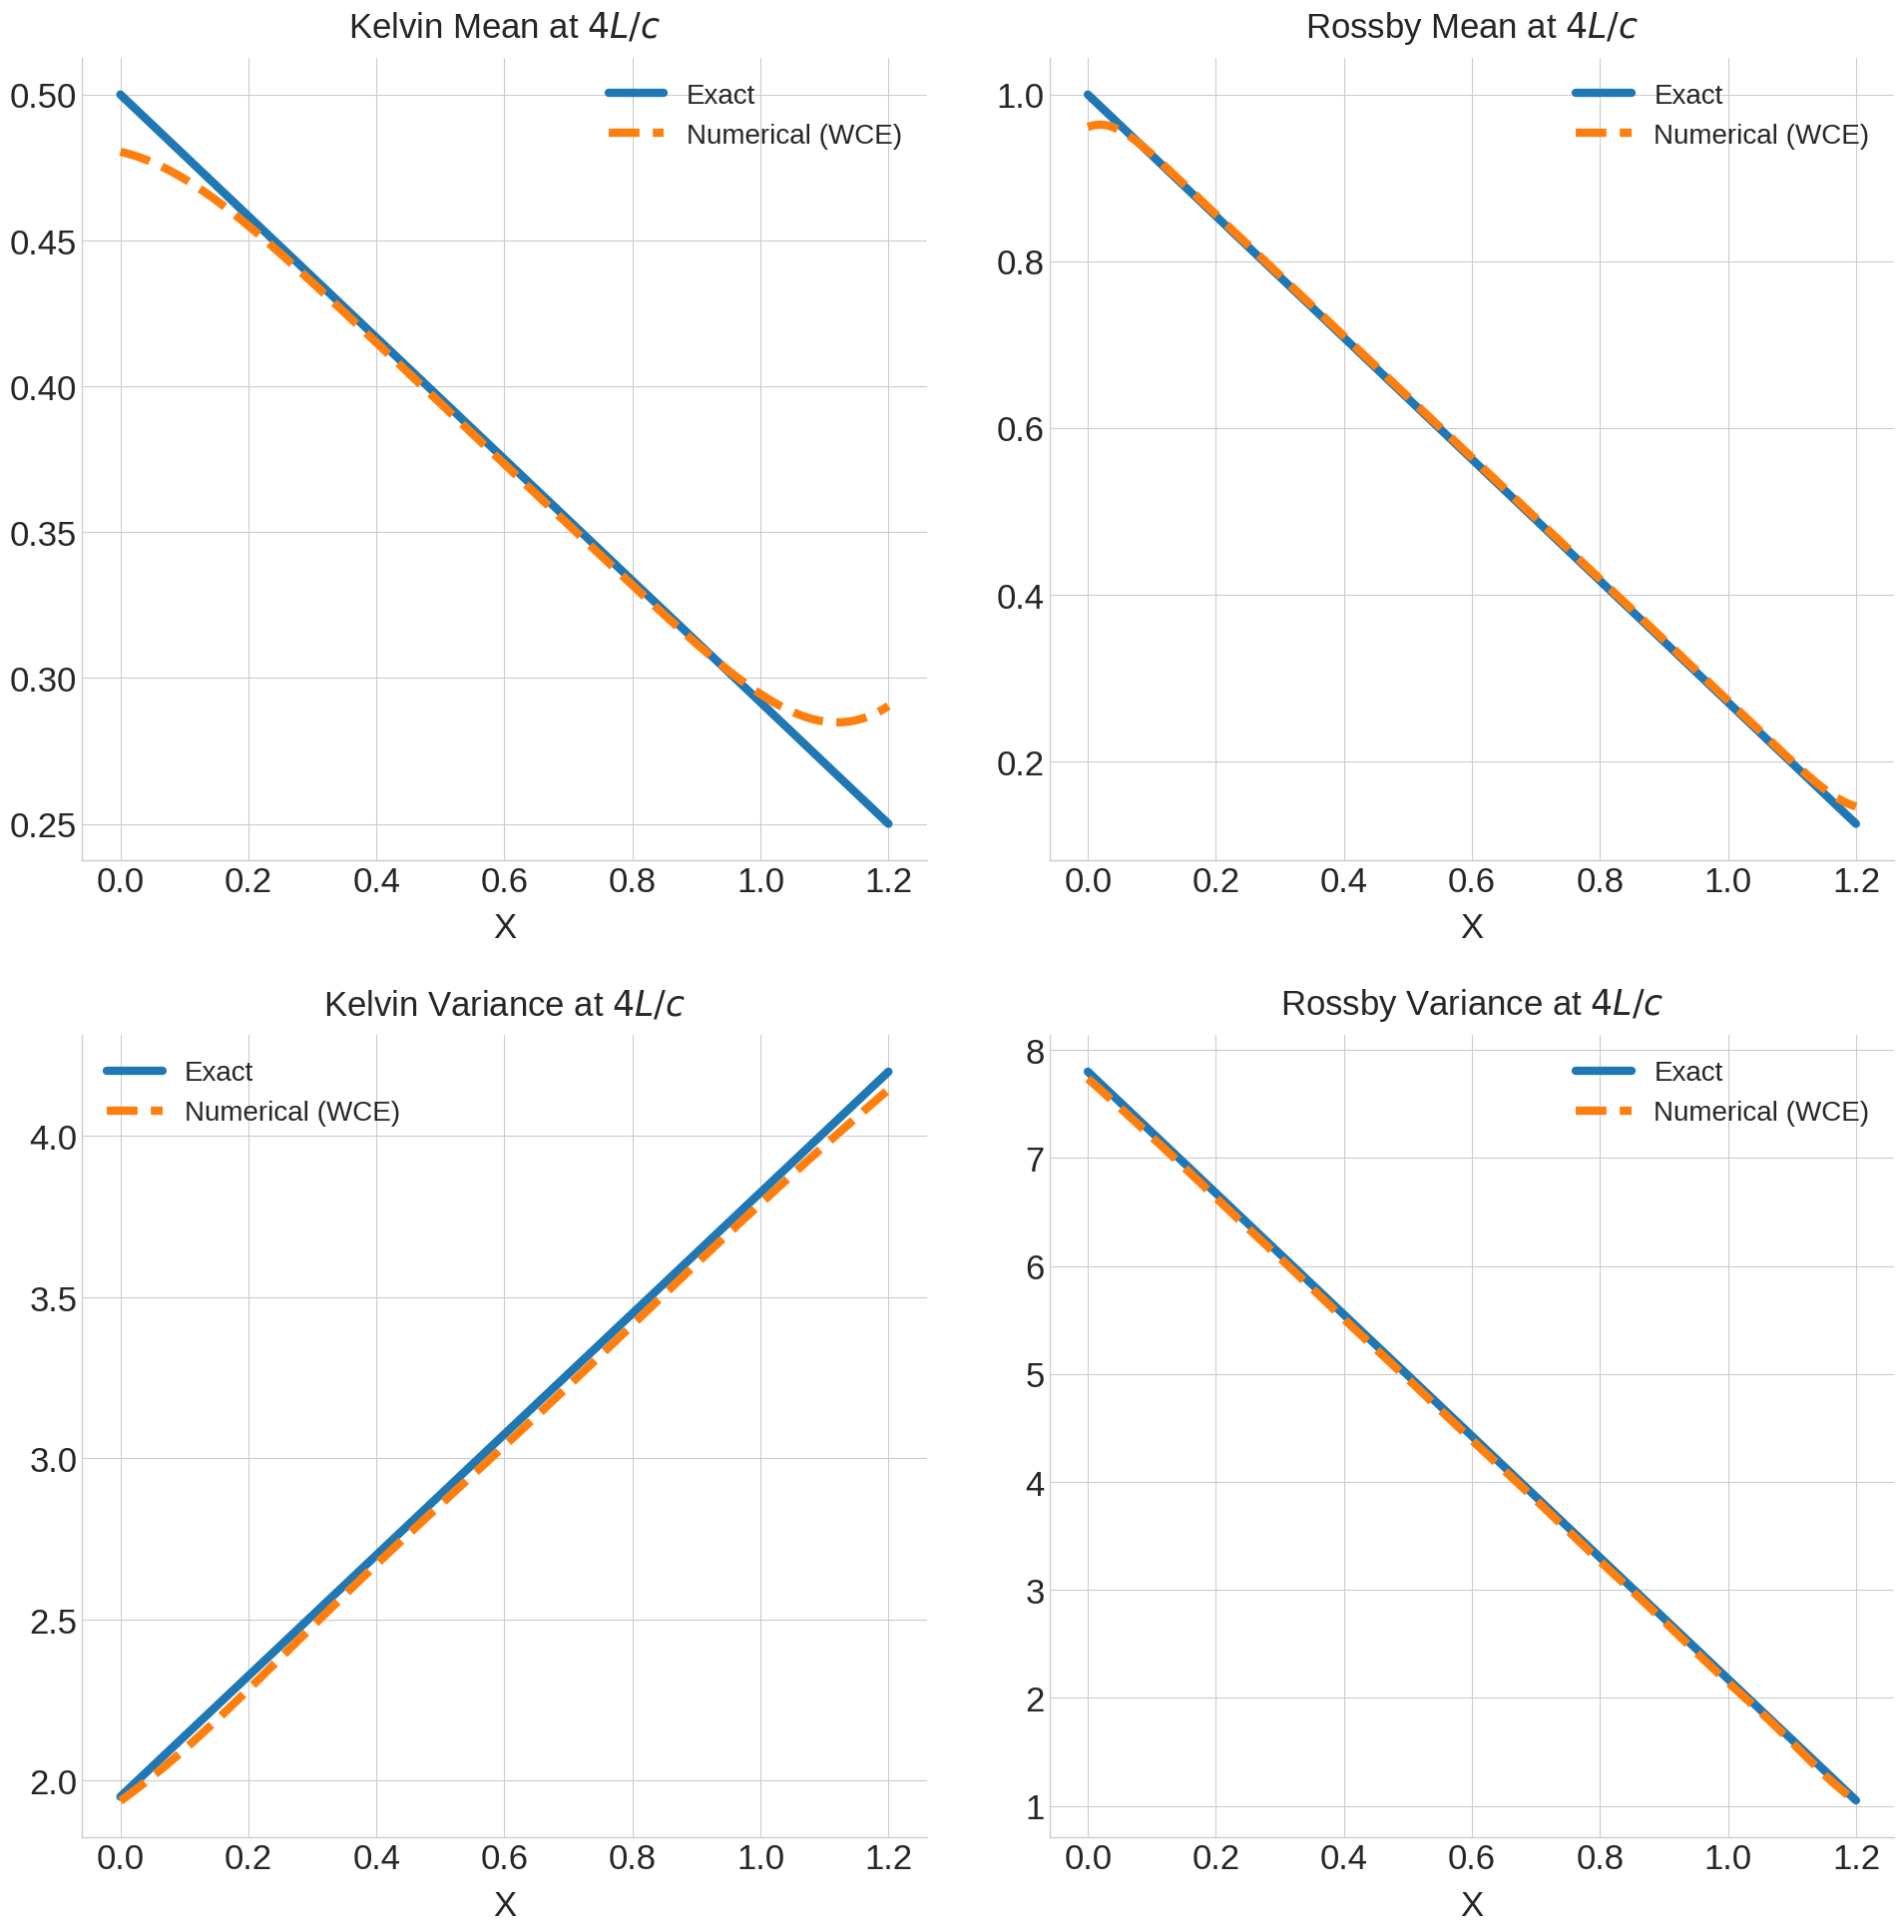

In [32]:
import matplotlib.pyplot as plt

# Set line width
linewidth = 6

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20), dpi=100)

# Use seaborn-whitegrid style for better aesthetics
plt.style.use('seaborn-whitegrid')

# Plot 1: Kelvin Mean at 4L/c
axs[0, 0].plot(xO, rw * re * KO[0, 0, :], linewidth=linewidth, label='Exact')
axs[0, 0].plot(xO, KO[0, -1, :], linestyle='--', linewidth=linewidth, label='Numerical (WCE)')
axs[0, 0].set_title('Kelvin Mean at $4L/c$', fontsize=25, pad=15)
axs[0, 0].legend(fontsize=20)
axs[0, 0].set_xlabel('X', fontsize=25, labelpad=10)
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='both', which='major', labelsize=25)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# Plot 2: Rossby Mean at 4L/c
axs[0, 1].plot(xO, rw * re * RO[0, 0, :], linewidth=linewidth, label='Exact')
axs[0, 1].plot(xO, RO[0, -1, :], linestyle='--', linewidth=linewidth, label='Numerical (WCE)')
axs[0, 1].set_title('Rossby Mean at $4L/c$', fontsize=25, pad=15)
axs[0, 1].legend(fontsize=20)
axs[0, 1].set_xlabel('X', fontsize=25, labelpad=10)
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='both', which='major', labelsize=25)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)

# Plot 3: Kelvin Variance at 4L/c
axs[1, 0].plot(xO, Kelvin_variance(xO), linewidth=linewidth, label='Exact')
axs[1, 0].plot(xO, K_variance_W[-1, :], linestyle='--', linewidth=linewidth, label='Numerical (WCE)')
axs[1, 0].set_title('Kelvin Variance at $4L/c$', fontsize=25, pad=15)
axs[1, 0].legend(fontsize=20)
axs[1, 0].set_xlabel('X', fontsize=25, labelpad=10)
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='both', which='major', labelsize=25)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# Plot 4: Rossby Variance at 4L/c
axs[1, 1].plot(xO, Rossby_variance(xO), linewidth=linewidth, label='Exact')
axs[1, 1].plot(xO, R_variance_W[-1, :], linestyle='--', linewidth=linewidth, label='Numerical (WCE)')
axs[1, 1].set_title('Rossby Variance at $4L/c$', fontsize=25, pad=15)
axs[1, 1].legend(fontsize=20)
axs[1, 1].set_xlabel('X', fontsize=25, labelpad=10)
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='both', which='major', labelsize=25)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

# Display plot

# Save plot if needed
plt.savefig("Problem1_Mean_Variance_Terminal.png", bbox_inches='tight', dpi=300)
plt.show()


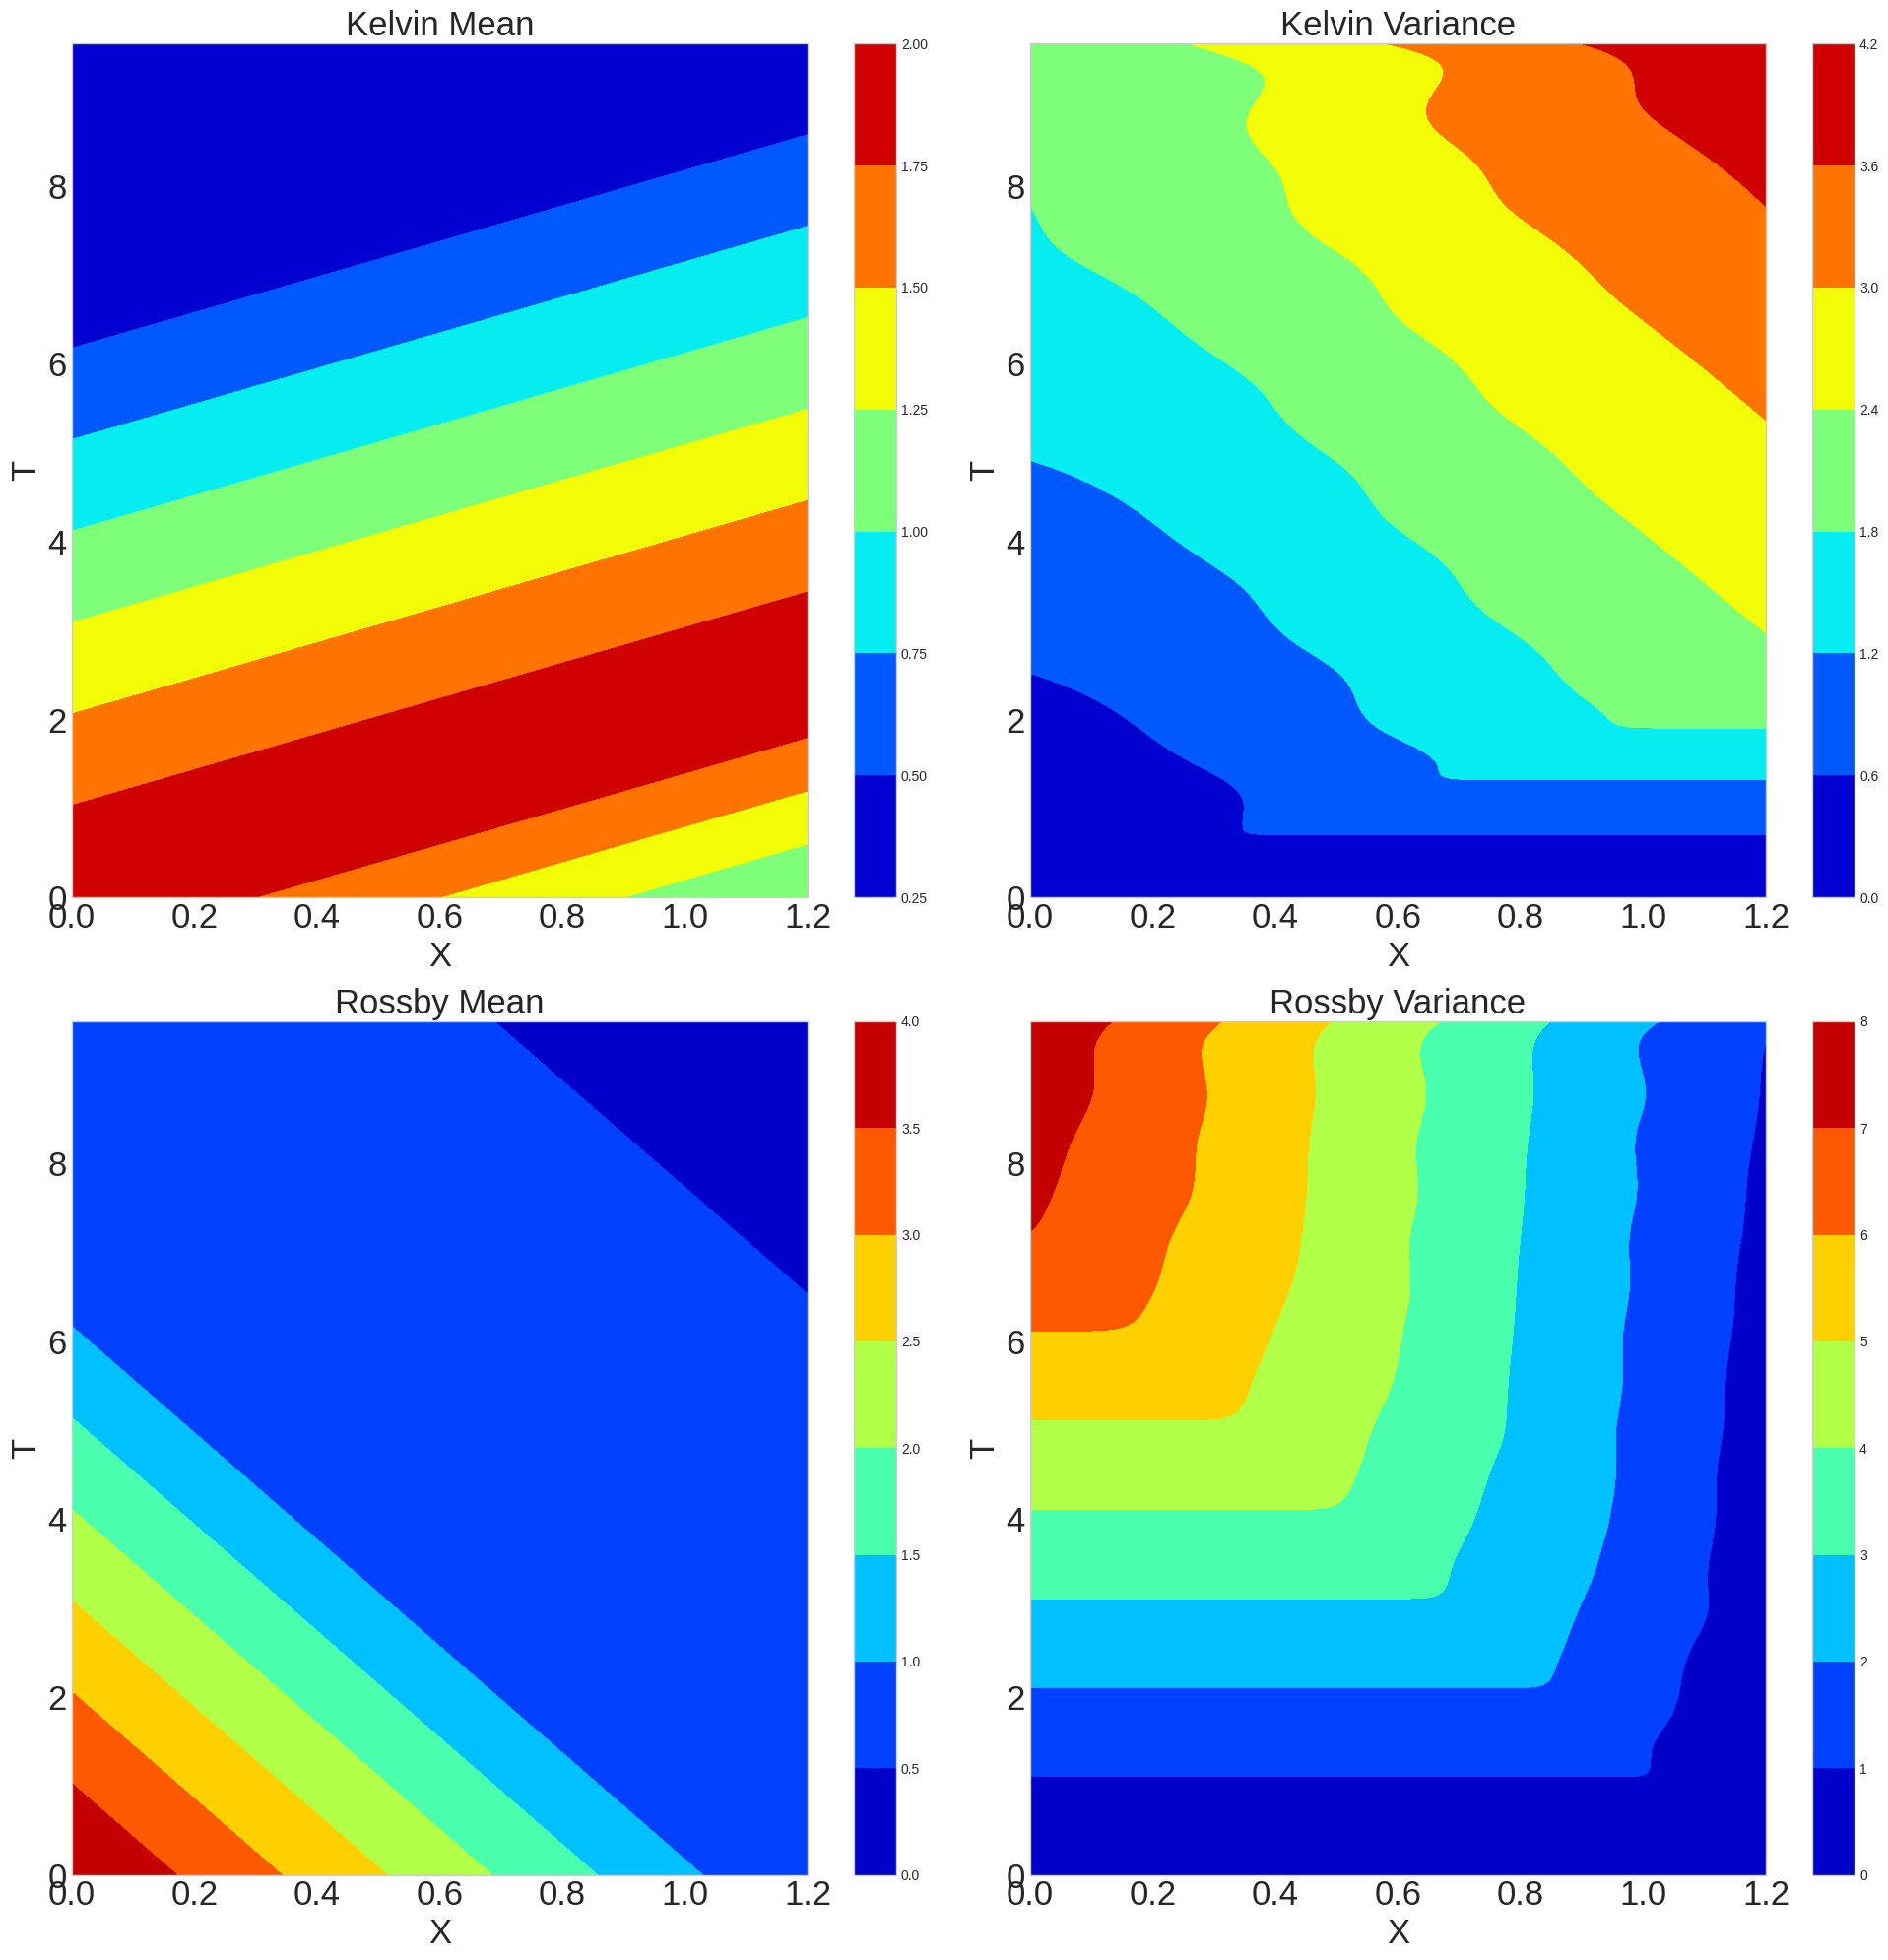

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
# x = np.linspace(0, 10, 100)
# t = np.linspace(0, 10, 100)
X, T = np.meshgrid(xO, t)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Contour plot for KO
cs1 = axs[0, 0].contourf(X, T, KO[0, :, :], cmap='jet')
axs[0, 0].set_title('Kelvin Mean', fontsize=25)
axs[0, 0].set_xlabel('X', fontsize=25)
axs[0, 0].set_ylabel('T', fontsize=25)
axs[0, 0].tick_params(axis='both', which='major', labelsize=25)
fig.colorbar(cs1, ax=axs[0, 0])

# Plot 2: Contour plot for K_variance_W
cs2 = axs[0, 1].contourf(X, T, K_variance_W[:, :], cmap='jet')
axs[0, 1].set_title('Kelvin Variance', fontsize=25)
axs[0, 1].set_xlabel('X', fontsize=25)
axs[0, 1].set_ylabel('T', fontsize=25)
axs[0, 1].tick_params(axis='both', which='major', labelsize=25)
fig.colorbar(cs2, ax=axs[0, 1])

# Plot 3: Contour plot for RO
cs3 = axs[1, 0].contourf(X, T, RO[0, :, :], cmap='jet')
axs[1, 0].set_title('Rossby Mean', fontsize=25)
axs[1, 0].set_xlabel('X', fontsize=25)
axs[1, 0].set_ylabel('T', fontsize=25)
axs[1, 0].tick_params(axis='both', which='major', labelsize=25)
fig.colorbar(cs3, ax=axs[1, 0])

# Plot 4: Contour plot for R_variance_W
cs4 = axs[1, 1].contourf(X, T, R_variance_W[:, :], cmap='jet')
axs[1, 1].set_title('Rossby Variance', fontsize=25)
axs[1, 1].set_xlabel('X', fontsize=25)
axs[1, 1].set_ylabel('T', fontsize=25)
axs[1, 1].tick_params(axis='both', which='major', labelsize=25)
fig.colorbar(cs4, ax=axs[1, 1])

plt.tight_layout()
plt.savefig("Problem1_Mean_Variance_2D_Contour_Plots.png")
plt.show()
